In [53]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random




In [54]:
all_genes = pd.read_csv('extracted_data/GxG_filled.csv', sep = ',', index_col = 0)
all_genes

ExE = pd.read_csv('extracted_data/ExE_imputed.csv', sep = ',', index_col = 0)
NxN = pd.read_csv('extracted_data/NxN_imputed.csv', sep = ',', index_col = 0)

R2:  -0.9572646383073453
RMSE: 0.09627551782754737


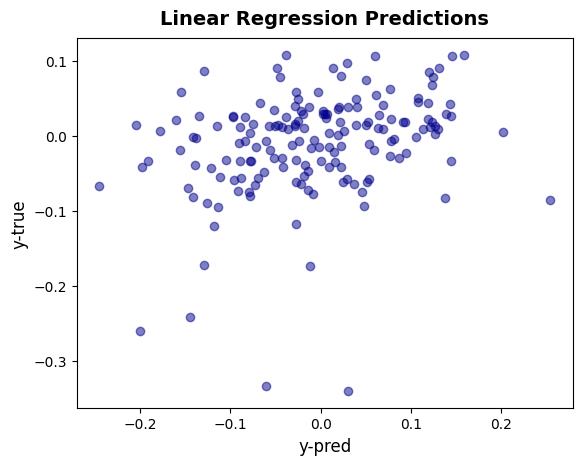

In [55]:
target_column = random.choice(ExE.columns)  # Randomly pick a column name

X = ExE.drop(columns=[target_column])  # Features (all columns except the target)
y = ExE[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9187816171948912


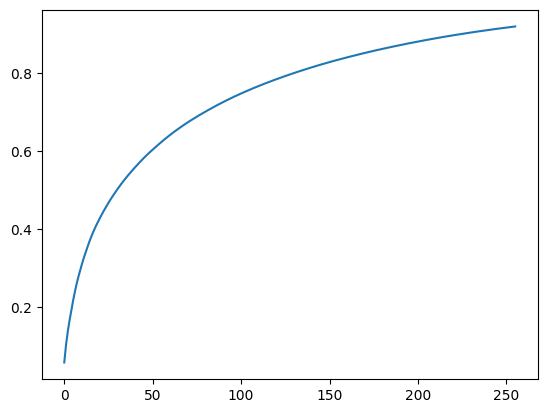

In [56]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [57]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.041997,-0.083678,-0.366999,0.458108,0.081402,0.042075,0.432428,-0.441507,-0.169839,-0.101875,...,0.019034,0.020794,-0.009762,-0.061694,0.060528,0.023732,-0.020031,-0.004582,-0.060449,0.035175
1,-0.197279,-0.117565,-0.498124,0.478679,-0.104472,0.040548,0.542612,-0.523306,-0.149298,0.122294,...,-0.029670,0.030232,0.031248,-0.116420,0.018312,-0.017856,-0.013983,0.057829,-0.060785,0.001785
2,-0.969683,-0.425074,0.113556,0.041018,0.063144,-0.153526,-0.041387,-0.101765,-0.141975,0.212058,...,0.060958,-0.031609,0.101216,0.074862,-0.051954,-0.005882,-0.000317,0.027009,-0.021676,0.001000
3,0.202018,-0.710353,-0.408823,0.951013,0.148075,-0.060593,0.467455,-0.149960,-0.554749,-0.476913,...,-0.125873,-0.027580,-0.011111,0.015150,0.030976,0.132034,-0.045628,-0.046894,0.012652,-0.021859
4,0.157084,0.190464,0.003896,0.232956,-0.234755,-0.238622,0.096598,0.205460,0.172440,-0.221021,...,-0.066736,0.031255,-0.053287,0.058813,-0.028887,0.029695,0.028434,-0.027966,0.045056,0.046684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.023274,0.116091,-0.052595,-0.179459,0.064472,0.213957,-0.002408,0.105550,0.095759,0.095602,...,-0.015424,-0.024394,0.012160,-0.118035,0.020790,-0.111973,-0.028281,-0.050110,0.038162,-0.007679
820,-0.053553,0.222588,0.134792,0.364024,-0.066177,0.314392,0.012068,-0.178228,-0.073253,-0.102893,...,0.030867,-0.000850,0.091658,-0.040297,0.088250,0.029521,0.014100,0.040244,-0.009736,-0.000587
821,-0.106579,0.356498,0.099510,0.288154,0.170200,0.520409,0.142110,-0.204839,-0.192567,-0.007334,...,0.041779,-0.003910,-0.012012,-0.020362,-0.076476,-0.057446,-0.004145,-0.004942,-0.044126,0.033138
822,0.062358,0.073549,-0.031587,-0.011074,0.172036,0.254936,0.115368,-0.042340,-0.049504,-0.073086,...,0.031832,-0.083714,-0.042362,0.040079,-0.013652,-0.072158,0.012221,-0.024403,-0.022921,0.035803


R2:  0.27000554864989945
RMSE: 0.05879641787400309


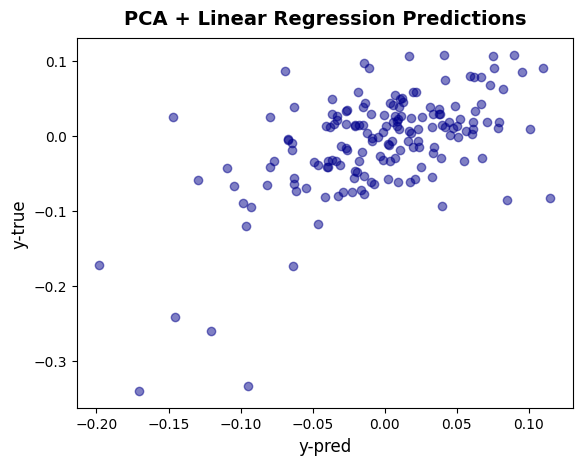

In [58]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2:  0.27709085726971694
RMSE: 0.05851038381153261


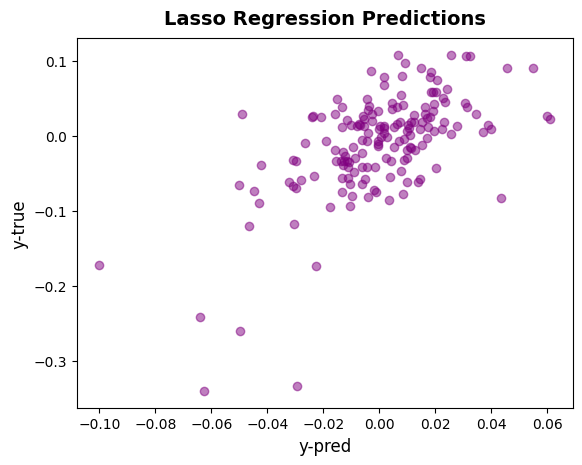

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.0004)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)


print('R2: ', lasso.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='purple')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Lasso Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2: 0.22476846638227443
RMSE: 0.06059081626582886


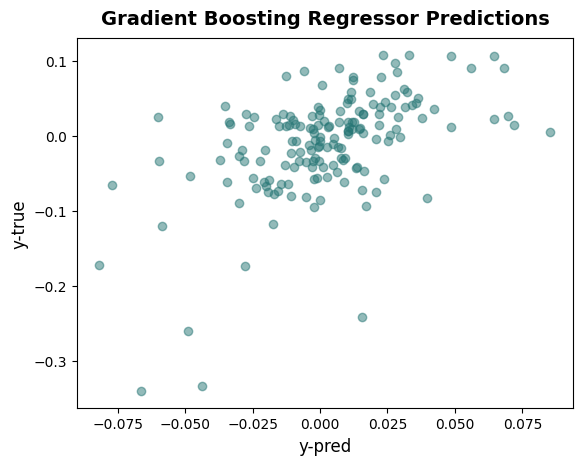

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='#267675')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Gradient Boosting Regressor Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2: 0.21971440334786063
RMSE: 0.06078800400996196


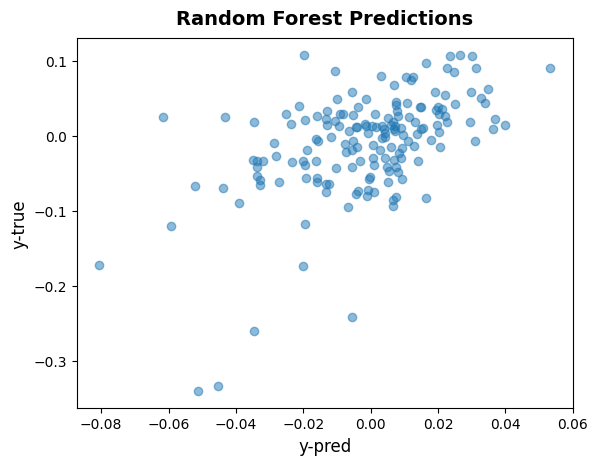

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Random Forest Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1972e-04 - mse: 5.1972e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8148e-04 - mse: 6.8148e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5041e-04 - mse: 2.5041e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1306e-04 - mse: 2.1306e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1942e-04 - mse: 1.1942e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3543e-05 - mse: 7.3543e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 9/50
17/17 ━━━━━━━

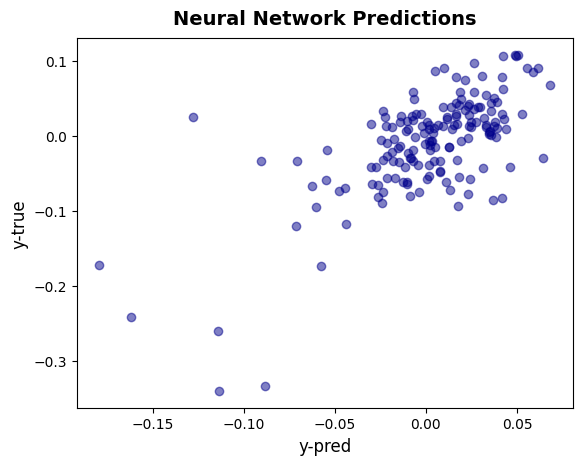

In [69]:
# Use Basic Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()